# Homework 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Exercise 5.4: 2 (g, h)
We will now derive the probability that a given observation is part
of a bootstrap sample. Suppose that we obtain a bootstrap sample
from a set of n observations.

**g)** Create a plot that displays, for each integer value of n from 1 to 100, 000, the probability that the jth observation is in the
bootstrap sample. Comment on what you observe.

In [2]:
#Compute the probability of a observation in bootstrap sample
def compute_prob(n) :
    return 1 - (1-1/n)**n

In [3]:
#Create an array of values from 1-100,000 and find probability of each
arr = np.arange(1,100001)
probs = {}

for n in arr :
    probs[n] = compute_prob(n)
    
lists = sorted(probs.items())
x, y = zip(*lists)

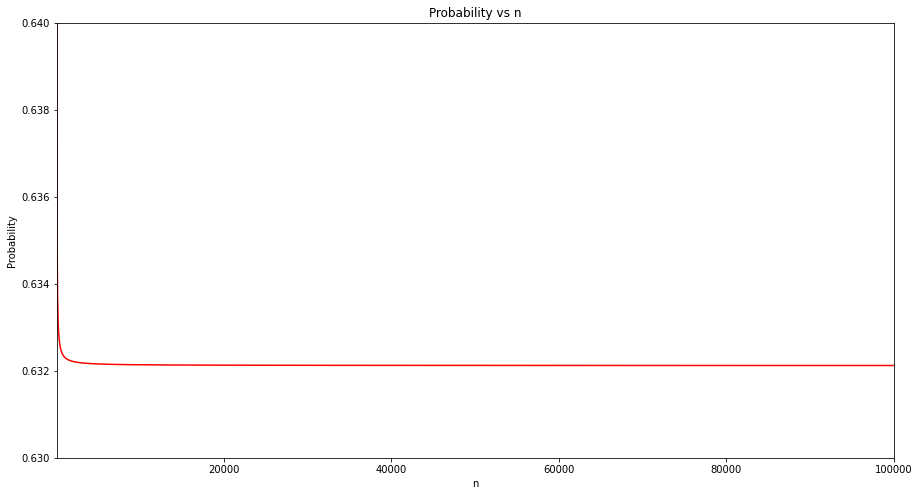

In [4]:
#Graph all values with the probability of each
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
plt.plot(x, y, color='r')
ax.set_xlabel('n')
ax.set_ylabel('Probability')
ax.set_title('Probability vs n')
ax.set_xlim(10, 100000)
ax.set_ylim(0.63, 0.64)

plt.show()

*TO-DO :: Observations*

**h)** We will now investigate numerically the probability that a boot-
strap sample of size n = 100 contains the jth observation. Here j = 4. We repeatedly create bootstrap samples, and each time
we record whether or not the fourth observation is contained in
the bootstrap sample.

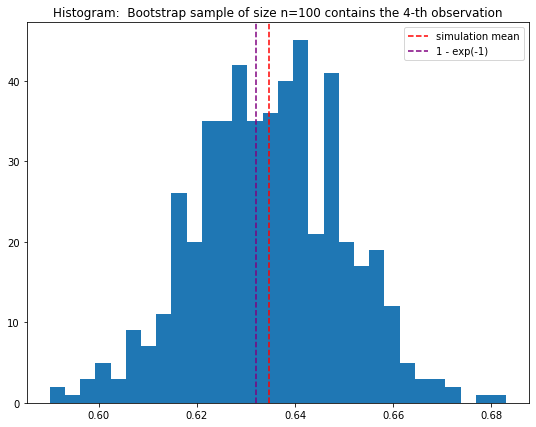

In [5]:
def compute_prob(iters, n, j) :
    sample = [(np.random.choice(n, n) == j).sum() > 0
             for i in range(0, iters)]
    sample = np.array(sample)
    return sample.mean()

def simulation(n, j, N) :
    sim_arr = [compute_prob(num_iterations, n, j)
              for i in range(0, N)]
    return sim_arr

num_iterations = int(1e3)
n = 100
j = 4

simulation_array = np.asarray(simulation(n, j, N=500))

plt.figure(figsize=(9, 7))
plt.hist(simulation_array, bins=30)  
plt.axvline(simulation_array.mean(), color='red', linestyle='--', label='simulation mean')
plt.axvline(1 - np.exp(-1), color='purple', linestyle='--', label='1 - exp(-1)')
plt.legend()
plt.title(f'Histogram:  Bootstrap sample of size n=100 contains the {j}-th observation');

### Exercise 7.9: 3

Suppose we fit a curve with basis functions b<sub>1</sub>(X) = X, b<sub>2</sub>(X) = (X-1)<sub>2</sub>I(X >= 1). We fit the linear regression model  <br/>
$$Y = β_0 + β_1b_1(X) + β_2b_2(X) + ε,$$
and obtain coefficient estimates β<sub>0</sub> = 1, β<sub>1</sub> = 1, β<sub>2</sub> = −2. Sketch the estimated curve between X = −2 and X = 2. Note the intercepts, slopes, and other relevant information.

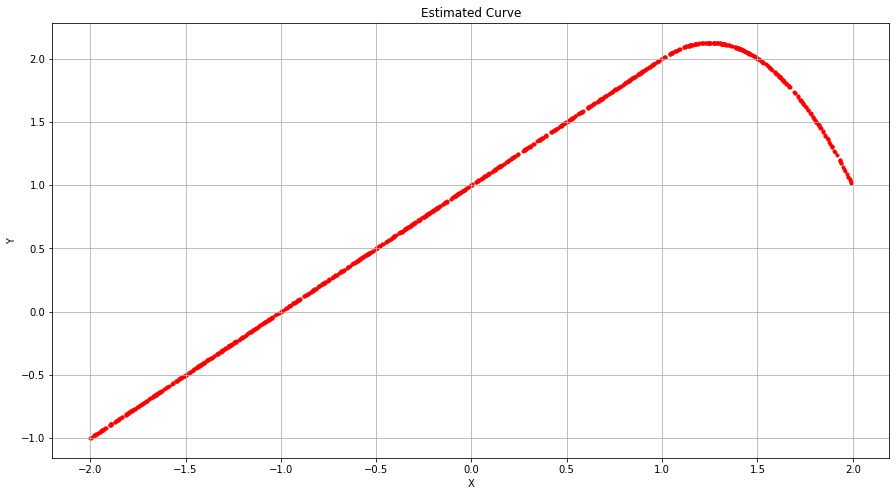

In [6]:
def model(x) :
    if x < 1 :
        return 1+x
    return 1+x-2*((x-1)**2)

X = np.random.uniform(low=-2.0, high=2.0, size=1000)
vfunc = np.vectorize(model)
Y = vfunc(X)

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
plt.scatter(X, Y, marker=".", color='r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Estimated Curve')
plt.grid(b=True)
plt.show()

*Note relevant information such as slope and intercepts*

### Exercise 8.4.2: 3, 11

**3)** Consider the Gini index, classification error, and entropy in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of p<sub>m1</sub> The x-axis should display p<sub>m1</sub>, ranging from 0 to 1, and the y-axis should display the
value of the Gini index, classification error, and entropy.

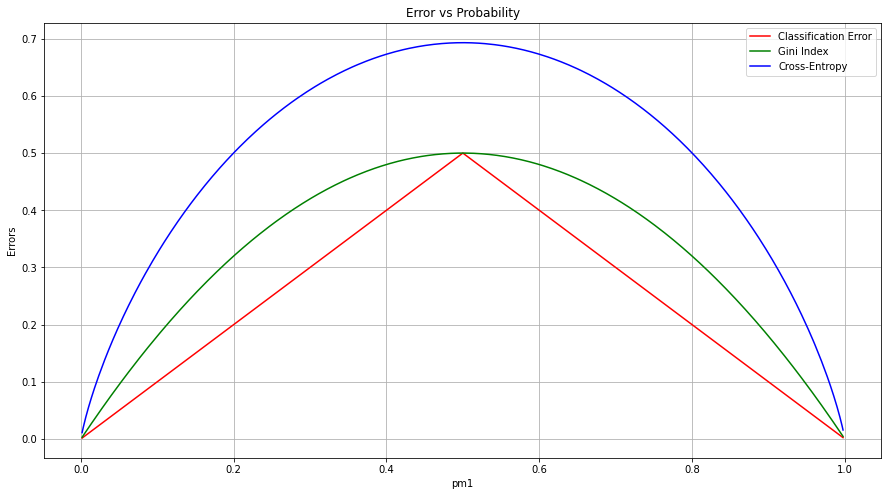

In [7]:
pm1 = np.random.uniform(0.0, 1.0, 1000)
pm2 = 1 - pm1
E = 1 - np.maximum(pm1, pm2)
G = np.add(np.multiply(pm1, pm2), np.multiply(pm1, pm2))
D = np.add(-pm1 * np.log(pm1), -pm2 * np.log(pm2))

E_dict = {}
G_dict = {}
D_dict = {}
for idx, pm in enumerate(pm1) :
    E_dict[pm] = E[idx]
    G_dict[pm] = G[idx]
    D_dict[pm] = D[idx]
    
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

lists = sorted(E_dict.items())
x, y = zip(*lists)
plt.plot(x, y, color='r', label='Classification Error')

lists = sorted(G_dict.items())
x, y = zip(*lists)
plt.plot(x, y, color='g', label='Gini Index')

lists = sorted(D_dict.items())
x, y = zip(*lists)
plt.plot(x, y, color='b', label='Cross-Entropy')

ax.set_xlabel('pm1')
ax.set_ylabel('Errors')
ax.set_title('Error vs Probability')

plt.legend()
plt.grid()
plt.show()

**11)** This question uses the Caravan data set.

**(a)** Create a training set consisting of the first 1,000 observations, and a test set consisting of the remaining observations.

In [8]:
caravan = pd.read_csv("../Data/Caravan.csv")
caravan = caravan.drop(['Unnamed: 0'], axis=1)
train = caravan.iloc[0:1000, :]
test = caravan.iloc[1000:, :]
print(train.shape)
print(test.shape)

(1000, 86)
(4822, 86)


**(b)** Fit a boosting model to the training set with Purchase as the response and the other variables as predictors. Use 1,000 trees, and a shrinkage value of 0.01. Which predictors appear to be the most important?

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, make_scorer

clf = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000)

X_train = train.drop(['Purchase'], axis=1)
y_train = train[['Purchase']]
X_test = test.drop(['Purchase'], axis=1)
y_test = test[['Purchase']]

clf.fit(X=X_train, y=y_train.values.ravel())
p = clf.predict(X_test)
print("Test Error Rate is: " + str(1-accuracy_score(p, y_test)))

In [ ]:
feature_importances = clf.feature_importances_

columns, importance = zip(*((columns, importance) for columns, importance in
                   zip(X_train.columns.tolist(), clf.feature_importances_)
                   if importance > 0.02))

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

plt.bar(list(columns), list(importance), alpha=0.3)

ax.set_xlabel('Feature')
ax.set_ylabel('Importance (> 0.02)')
plt.tight_layout()
plt.title("Importance of Features")
plt.grid()
plt.show()

*Discuss Results and findings*

**(c)** Use the boosting model to predict the response on the test data. Predict that a person will make a purchase if the estimated probability of purchase is greater than 20 %. Form a confusion matrix. What fraction of the people predicted to make a purchase do in fact make one? How does this compare with the results obtained from applying KNN or logistic regression to this data set?

In [ ]:
y_pred = pd.Series(p)
y_true = (y_test['Purchase'])
y_true.reset_index(drop=True, inplace=True)

pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

*Discuss findings and compare the results*